<a href="https://colab.research.google.com/github/Hasinigammune/Mall_costomer_segmentation/blob/main/Mall_customer_segmentation_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler

#clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import requests

# seaborn library
import seaborn as sns

#plotting libraries
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import scatter_matrix
import plotly.express as px
import plotly.figure_factory as ff

import warnings
from tabulate import tabulate

In [ ]:
# Import data from GitHub using the url bellow
data_path='https://raw.githubusercontent.com/Hasinigammune/Mall_costomer_segmentation/main/Mall_Customers.csv'
df=pd.read_csv(data_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from pandas.core.describe import DataFrameDescriber
#Removing null values
df = df.dropna()
df.isnull().sum()

#removing ID column
customer = df.drop("CustomerID",axis=1)
customer.columns=["Gender","Age",	"Annual Income",	"Spending Score"]

In [ ]:
customer.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Text(0.5, 0.98, 'Histograms of world Dataset')

<Figure size 1000x1000 with 0 Axes>

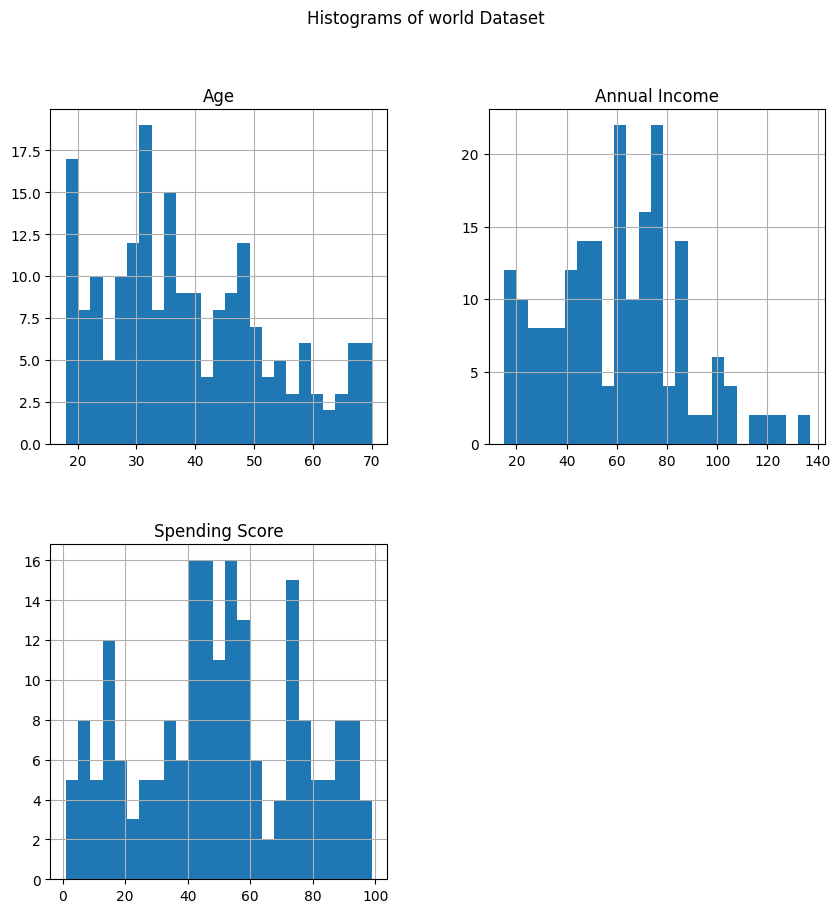

In [ ]:
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 10))

# Histograms
customer.hist( bins=25,figsize=(10,10))
plt.suptitle("Histograms of world Dataset", fontsize=12)

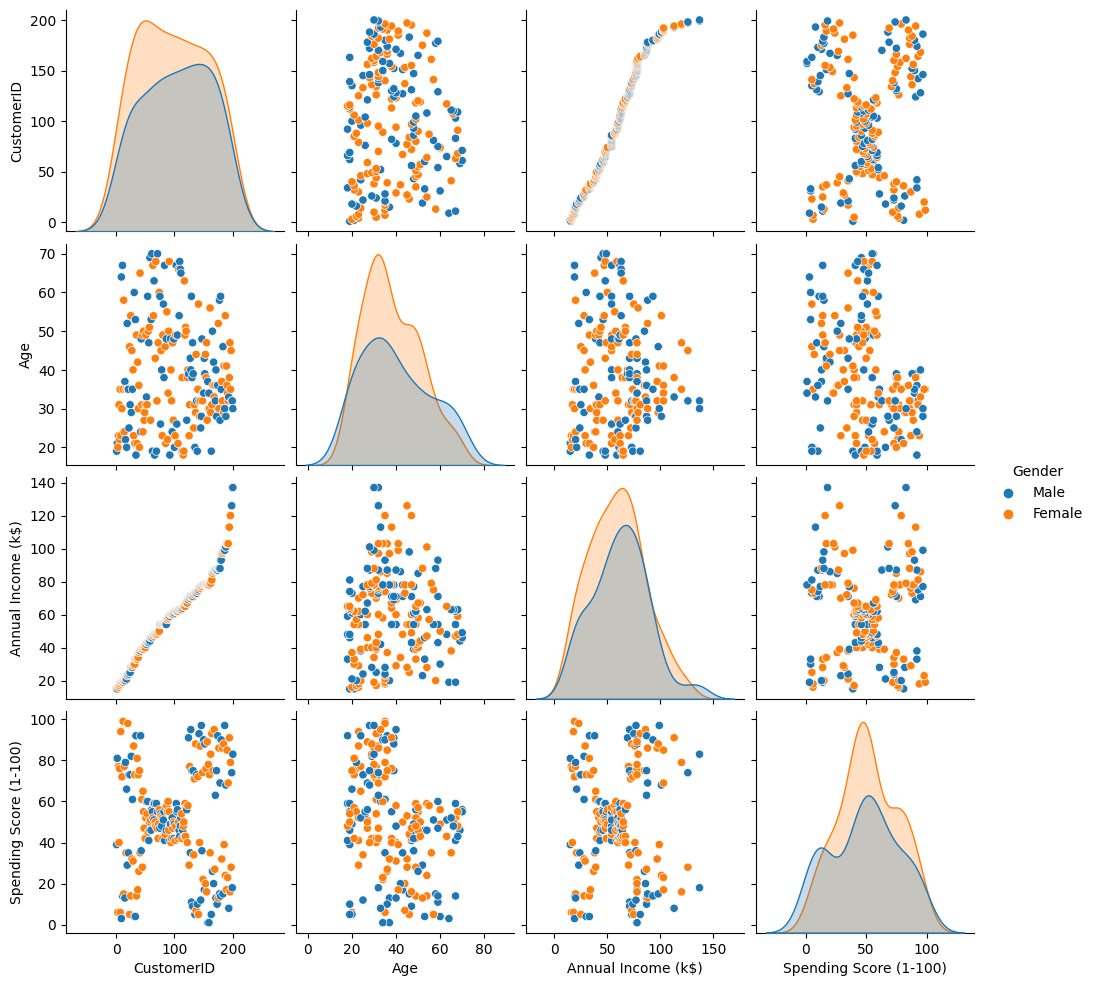

In [ ]:
# Correlation analysis
sns.pairplot(df,hue='Gender')

- The variation of data with gender is not that much visible. But when considering the distributions, the distribution with respect to female always lie above the distribution of male.

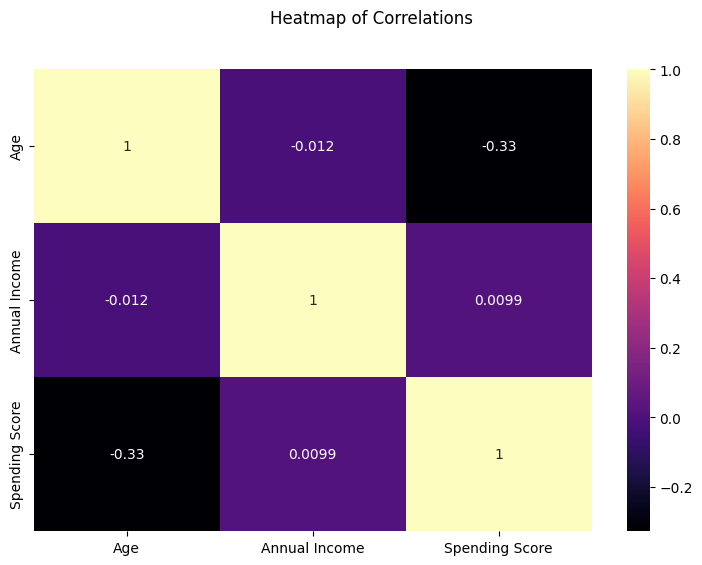

In [ ]:
fig , ax = plt.subplots(figsize = (9,6))
sns.heatmap(customer.corr() , annot = True , ax = ax, cmap='magma')
plt.suptitle("Heatmap of Correlations", fontsize=12)
plt.show()

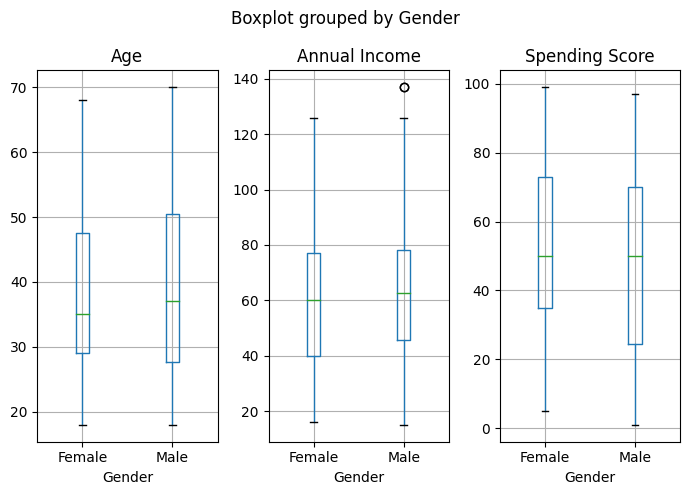

In [ ]:
features = ["Age",	"Annual Income",	"Spending Score"]
customer['Gender'] = pd.Categorical(customer['Gender'])

fig = plt.figure(figsize=(7, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, feature in enumerate(features, 1):
  axs = fig.add_subplot(1, 3, i)
  customer.boxplot(column=feature, by='Gender', ax=axs)
  axs.set_title(feature)

fig.tight_layout()
plt.show()

- As the correlation between most of the variables are very low, therefore, rather than going with the correlation-based distance, we can use metric-based distance for clustering.
- Also I would suggest standardizing the variables as they are in different scales and some have very high ranges.
- There is not much variation of the variables when the Gender is condisered.

**Hierarchical Clustering with Complete linkage**

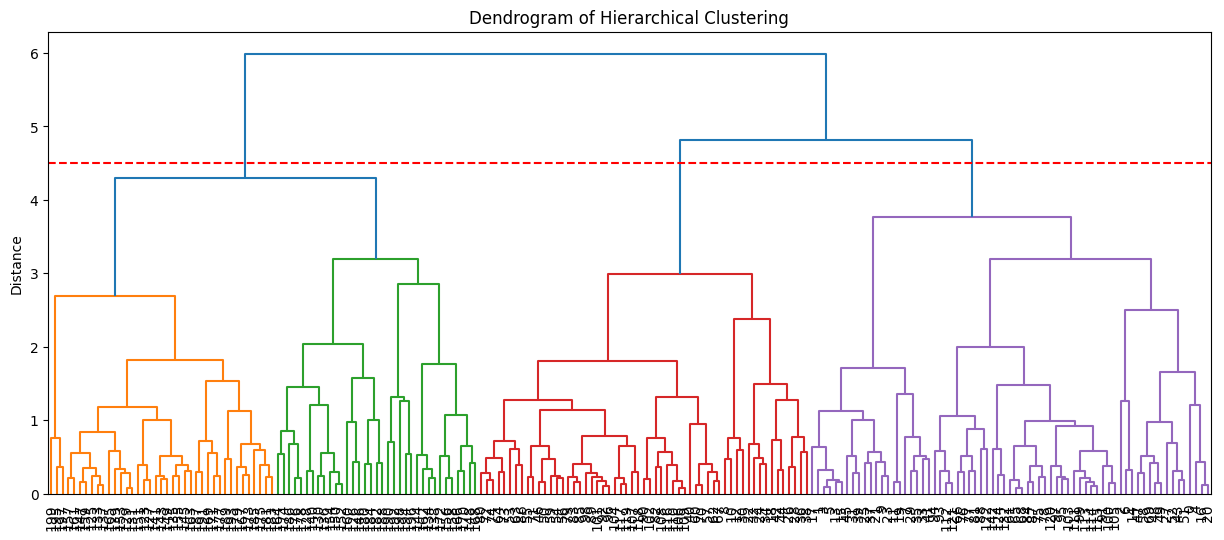

[3 3 3 3 3 3 3 3 2 3 2 3 2 3 3 3 3 3 2 3 3 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 3 2 3 3 2 2 2 2
 2 3 3 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
customer_sub=customer.drop("Gender",axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_sc = scaler.fit_transform(customer_sub)

# Perform hierarchical clustering
customer_complete = linkage(customer_sc, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 6))
dendrogram(customer_complete, labels=customer_sub.index, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
plt.axhline(y=4.5, color='red', linestyle='--')
plt.show()

# Cut the tree at a specific height to obtain clusters
clusters = fcluster(customer_complete, t=4.5, criterion='distance')
print(clusters)

In [ ]:
# Convert the 'clusters' array to 'clust' variable
clust = clusters

# Get the number of observations within each cluster
table_counts = pd.Series(clust).value_counts().sort_index()

# Create a DataFrame with cluster means for each variable
c1 = customer_sub[clust == 1].mean()
c2 = customer_sub[clust == 2].mean()
c3 = customer_sub[clust == 3].mean()
#c4 = customer_sub[clust == 4].mean()
d = pd.DataFrame([c1, c2, c3], index=["Cluster 1", "Cluster 2", "Cluster 3"])

# Convert 'd' DataFrame to a formatted string table
table_d = d.to_string()

# Display the tables
print("Number of observations within each cluster (Hierarchical Clustering):")
print(table_counts)
print("\nCluster means of the variables (Hierarchical Clustering):")
#print(table_d)
print(tabulate(d, headers=d.keys(), tablefmt='grid'))

Number of observations within each cluster (Hierarchical Clustering):
1    74
2    57
3    69
dtype: int64

Cluster means of the variables (Hierarchical Clustering):
+-----------+---------+-----------------+------------------+
|           |     Age |   Annual Income |   Spending Score |
+===========+=========+=================+==================+
| Cluster 1 | 36.9459 |         87.3378 |          51.4595 |
+-----------+---------+-----------------+------------------+
| Cluster 2 | 55.3333 |         47.3158 |          41.0877 |
+-----------+---------+-----------------+------------------+
| Cluster 3 | 27.2754 |         42.7826 |          56.3768 |
+-----------+---------+-----------------+------------------+


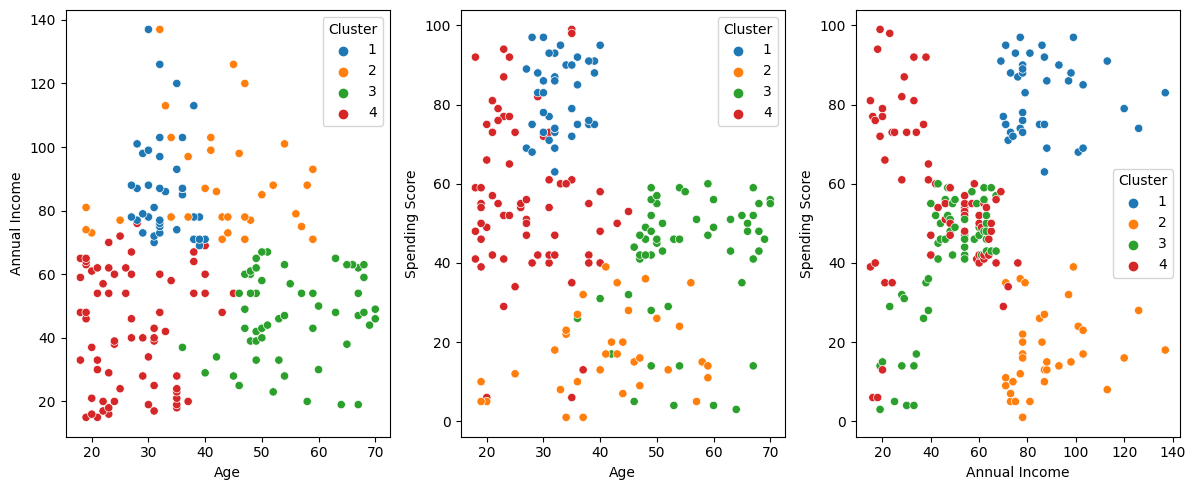

In [ ]:
customer_clust=pd.concat([customer, pd.Series(clust, name='Cluster')], axis=1)
#customer_clust.head()

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_clust, x ='Age',y='Annual Income',hue='Cluster',palette='tab10')
plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_clust, x ='Age',y='Spending Score',hue='Cluster',palette='tab10')
plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_clust, x ='Annual Income',y='Spending Score',hue='Cluster',palette='tab10')
plt.tight_layout()
plt.show()


*   Cluster 1 : High Annual Income cluster
*   Cluster 2 : Seniors with Low Annual Income cluster
*   Cluster 3 : Youngsters with Low Annual Income cluster

In [ ]:
# Cut the tree at a specific height to obtain clusters
clusters = fcluster(customer_complete, t=4, criterion='distance')
print(clusters)
clust = clusters

# Get the number of observations within each cluster
table_counts = pd.Series(clust).value_counts().sort_index()

# Create a DataFrame with cluster means for each variable
c1 = customer_sub[clust == 1].mean()
c2 = customer_sub[clust == 2].mean()
c3 = customer_sub[clust == 3].mean()
c4 = customer_sub[clust == 4].mean()
d = pd.DataFrame([c1, c2, c3,c4], index=["Cluster 1", "Cluster 2", "Cluster 3","Cluster 4"])

# Convert 'd' DataFrame to a formatted string table
table_d = d.to_string()

# Display the tables
print("Number of observations within each cluster (Hierarchical Clustering):")
print(table_counts)
print("\nCluster means of the variables (Hierarchical Clustering):")
#print(table_d)
print(tabulate(d, headers=d.keys(), tablefmt='grid'))

[4 4 4 4 4 4 4 4 3 4 3 4 3 4 4 4 4 4 3 4 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 4 3 4 4 3 3 3 3
 3 4 4 4 4 3 3 4 3 3 4 3 3 4 4 3 3 4 3 4 4 4 3 4 3 4 4 3 3 4 3 4 3 3 3 3 3
 4 4 4 4 4 3 3 3 3 4 4 4 1 4 1 2 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Number of observations within each cluster (Hierarchical Clustering):
1    39
2    35
3    57
4    69
dtype: int64

Cluster means of the variables (Hierarchical Clustering):
+-----------+---------+-----------------+------------------+------------+
|           |     Age |   Annual Income |   Spending Score |   3Cluster |
+===========+=========+=================+==================+============+
| Cluster 1 | 32.6923 |         86.5385 |          82.1282 |    0       |
+-----------+---------+-----------------+------------------+------------+
| Cluster 2 | 41.6857 |         88.2286 |        

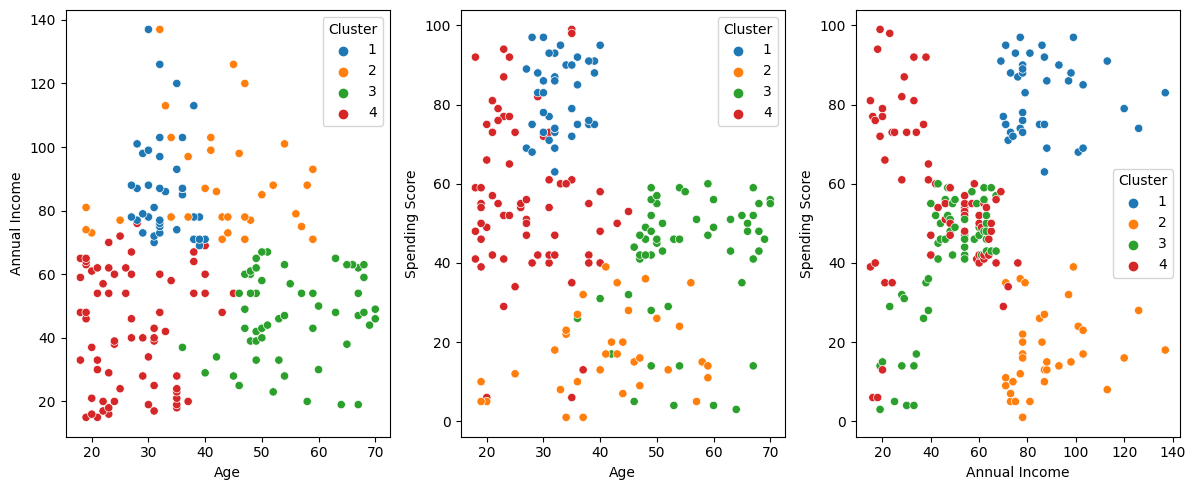

In [ ]:
customer_clust=pd.concat([customer, pd.Series(clust, name='Cluster')], axis=1)
#customer_clust.head()

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_clust, x ='Age',y='Annual Income',hue='Cluster',palette='tab10')
plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_clust, x ='Age',y='Spending Score',hue='Cluster',palette='tab10')
plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_clust, x ='Annual Income',y='Spending Score',hue='Cluster',palette='tab10')
plt.tight_layout()
plt.show()

- A clear seperation between the clusters can be identified when we consider 3 clusters. The clusters can be clearly seperated with "Age" and "Annual Income". But when 4 clusters are considered, cluster overlapping occur.

**K-means clustering with k = 3**

In [ ]:
km3 = KMeans(n_clusters=3)
km3.fit(customer_sub)
customer_k3=customer_sub
customer_k3["3Cluster"]=km3.labels_
#customer_k3.head()

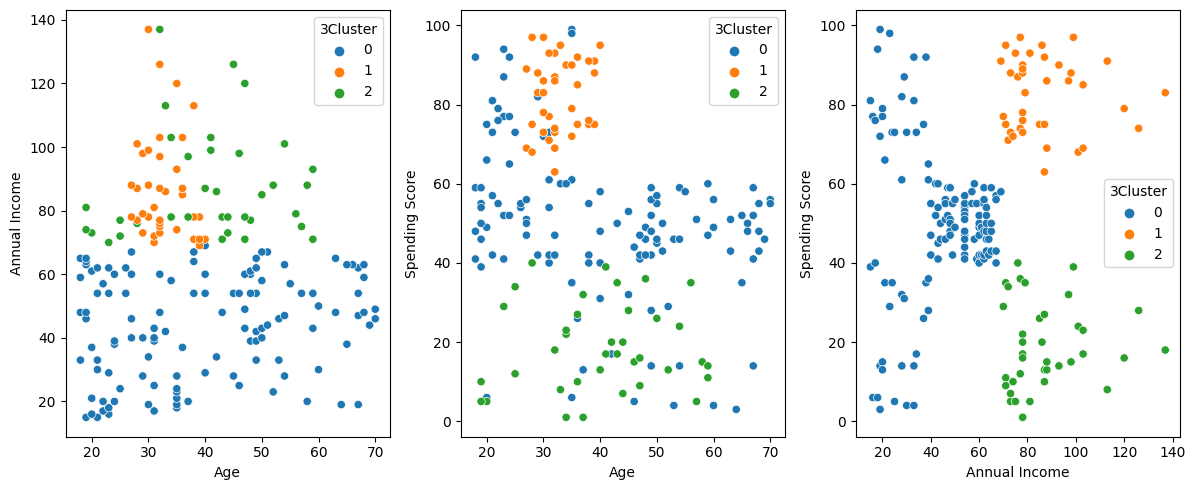

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_k3, x ='Age',y='Annual Income',hue='3Cluster',palette='tab10')
plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_k3, x ='Age',y='Spending Score',hue='3Cluster',palette='tab10')
plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_k3, x ='Annual Income',y='Spending Score',hue='3Cluster',palette='tab10')
plt.tight_layout()
plt.show()

- When k=3, clear seperation of the clusters can be seen when "Spending score" and "Annual Income" are considered.



*   Cluster 0 : Low Annual Income Cluster
*   Cluster 1 : High Annual Income and High Spending score cluster
*   Cluster 2 : High Annual Income and Low Spending score cluster



In [ ]:
k3=customer_k3.corr()['3Cluster']

**K-means clustering with k = 4**

In [ ]:
km4 = KMeans(n_clusters=4)
km4.fit(customer_sub)
customer_k4=customer_sub
customer_k4["4Cluster"]=km4.labels_
#customer_k4.head()

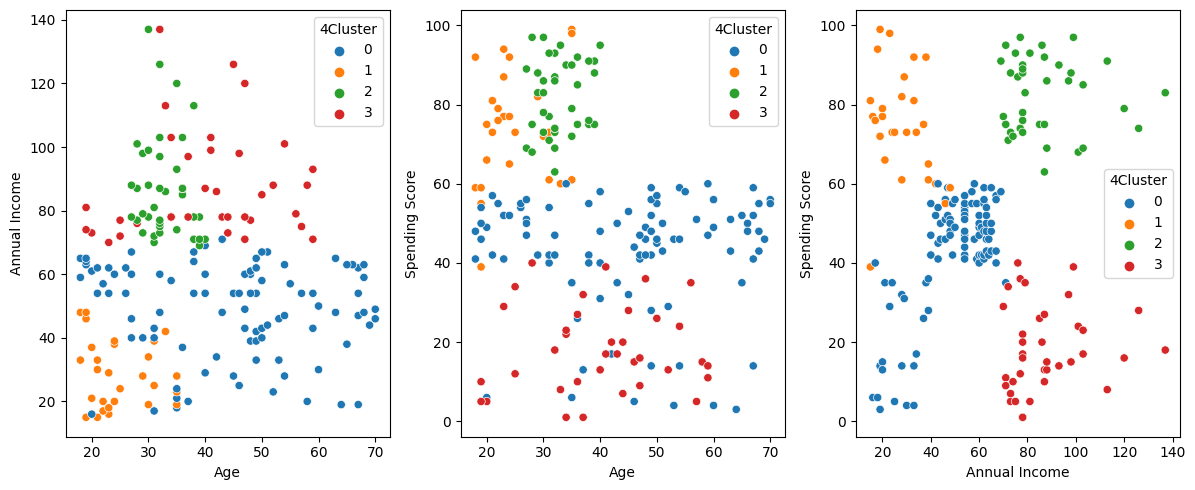

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_k4, x ='Age',y='Annual Income',hue='4Cluster',palette='tab10')
plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_k4, x ='Age',y='Spending Score',hue='4Cluster',palette='tab10')
plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_k4, x ='Annual Income',y='Spending Score',hue='4Cluster',palette='tab10')
plt.tight_layout()
plt.show()

- When k=4, a seperation of the clusters can be seen when "Spending score" and "Annual Income" are considered, although there are very few overlappings.  



*   Cluster 0 : High Annual Income and High Spending score cluster
*   Cluster 1 : High Annual Income and Low Spending score cluster
*   Cluster 2 : Low Annual Income and Low Spending score cluster
*   Cluster 3 : Low Annual Income and High Spending score cluster



In [ ]:
k4=customer_k4.corr()['4Cluster']

**K-means clustering with k = 5**

In [ ]:
km5 = KMeans(n_clusters=5)
km5.fit(customer_sub)
customer_k5=customer_sub
customer_k5["5Cluster"]=km5.labels_
#customer_k4.head()

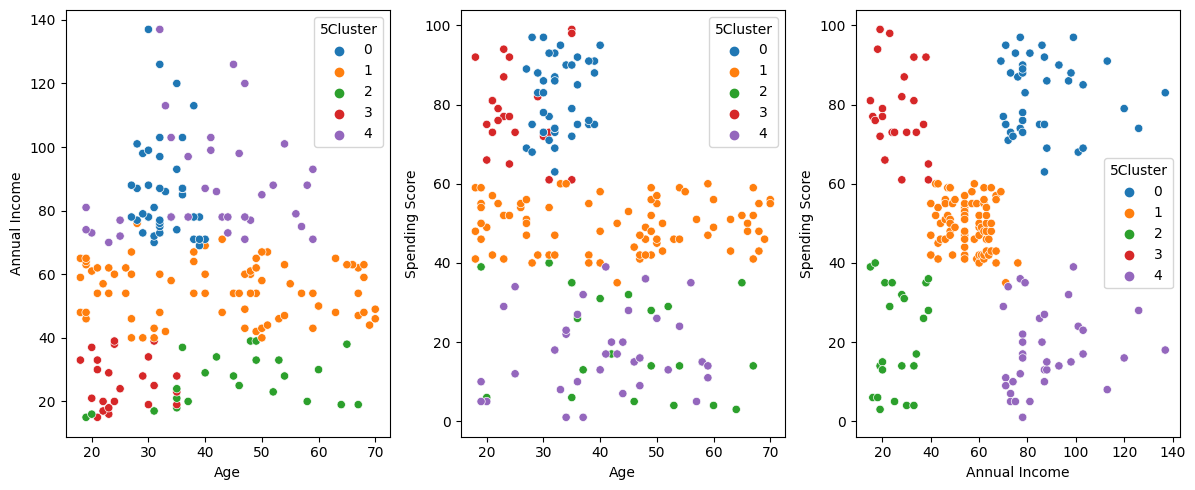

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_k5, x ='Age',y='Annual Income',hue='5Cluster',palette='tab10')
plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_k5, x ='Age',y='Spending Score',hue='5Cluster',palette='tab10')
plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_k5, x ='Annual Income',y='Spending Score',hue='5Cluster',palette='tab10')
plt.tight_layout()
plt.show()

- When k=5 also, a seperation of the clusters can be seen when "Spending score" and "Annual Income" are considered, although there are very few overlappings.  



*   Cluster 0 : Average Annual Income and Average Spending score cluster
*   Cluster 1 : High Annual Income and Low Spending score cluster
*   Cluster 2 : High Annual Income and High Spending score cluster
*   Cluster 3 : Low Annual Income and Low Spending score cluster
*   Cluster 3 : Low Annual Income and High Spending score cluster



In [ ]:
k5=customer_k5.corr()['5Cluster']

**K-means clustering with k = 6**

In [ ]:
km6 = KMeans(n_clusters=6)
km6.fit(customer_sub)
customer_k6=customer_sub
customer_k6["6Cluster"]=km6.labels_
#customer_k4.head()

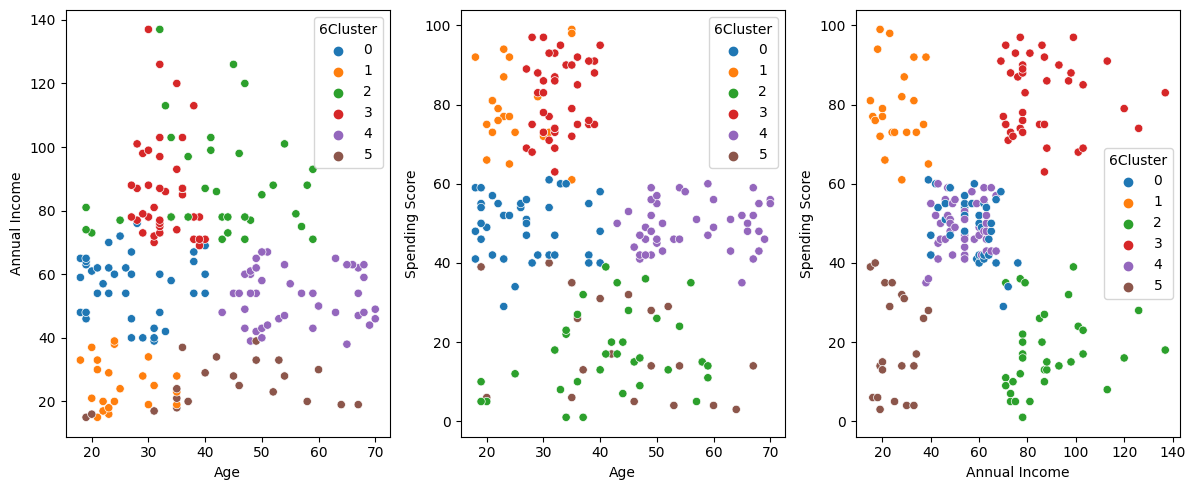

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_k6, x ='Age',y='Annual Income',hue='6Cluster',palette='tab10')
plt.subplot(1, 3, 2)
sns.scatterplot(data=customer_k6, x ='Age',y='Spending Score',hue='6Cluster',palette='tab10')
plt.subplot(1, 3, 3)
sns.scatterplot(data=customer_k6, x ='Annual Income',y='Spending Score',hue='6Cluster',palette='tab10')
plt.tight_layout()
plt.show()

- When k=6, no seperation of the clusters can be seen.  



In [ ]:
k6=customer_k6.corr()['6Cluster']

In [ ]:
combined_corr_df = pd.concat([k3, k4, k5,k6], axis=1)
corr_df = combined_corr_df.dropna().drop(['3Cluster','4Cluster','5Cluster','6Cluster'],axis=0)
corr_df.columns= ["k=3", "k=4", "k=5","k=6"]
print(tabulate(corr_df, headers=corr_df.keys(), tablefmt='grid'))
#print(corr_df)

+----------------+------------+------------+-------------+------------+
|                |        k=3 |        k=4 |         k=5 |        k=6 |
+================+============+============+=============+============+
| Age            | -0.0557432 | -0.21456   | -0.00785916 |  0.623662  |
+----------------+------------+------------+-------------+------------+
| Annual Income  |  0.730035  |  0.662294  | -0.0607372  | -0.0932957 |
+----------------+------------+------------+-------------+------------+
| Spending Score | -0.283482  | -0.0637048 | -0.580399   | -0.159538  |
+----------------+------------+------------+-------------+------------+


- We can observe that the correlation of the features with respect to the clusters are not the same. It seems like the algorithm chose certain features much higher than that of others.

**Scree Plot**

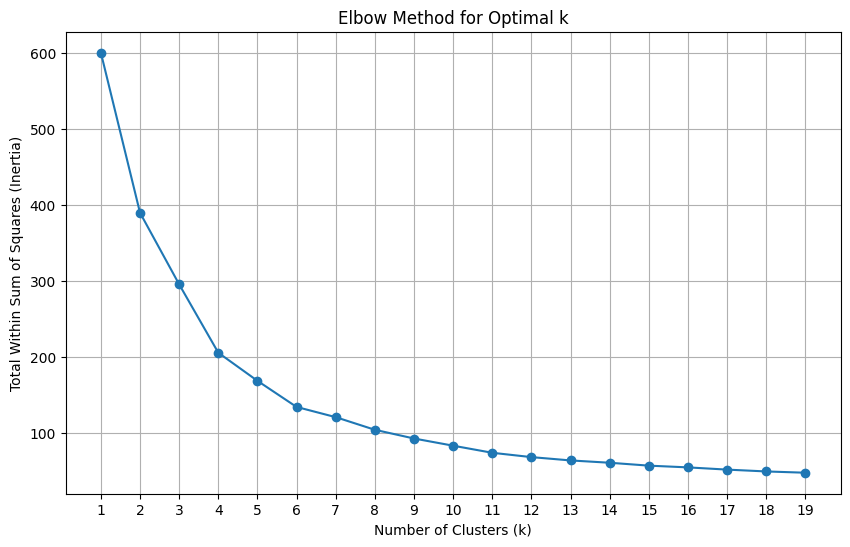

In [ ]:
# Create a list to store the total within sum of squares (inertia) for different values of k (number of clusters)
inertias = []
k_range = range(1, 20)  # Change the range according to your preference, e.g., (1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_sc)
    inertias.append(kmeans.inertia_)

# Plot the number of clusters vs. total within sum of squares
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Within Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

- From the scree plot, we can see that the optimal number of cluters in 5